# Missing investors

Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the `banking` DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing `inv_amount` values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The `pandas`, `missingno` and `matplotlib.pyplot` packages have been imported as `pd`, `msno` and `plt` respectively. The `banking` DataFrame is in your environment.

In [4]:
import pandas as pd
import numpy as np
from faker import Faker
import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt
fake = Faker()
path=r'Z:/'
file='banking_dirty.csv'
banking = pd.read_csv(path+file,index_col = [0],parse_dates=['birth_date'])
acct_cur = [fake.random_element(elements=('dollar', 'euro')) for _ in range(len(banking))]
banking['acct_cur']=acct_cur
print(banking.head(),'\n')

    cust_id birth_date  Age  acct_amount  inv_amount   fund_A   fund_B  \
0  870A9281 1962-06-09   58     63523.31       51295  30105.0   4138.0   
1  166B05B0 1962-12-16   58     38175.46       15050   4995.0    938.0   
2  BFC13E88 1990-09-12   34     59863.77       24567  10323.0   4590.0   
3  F2158F66 1985-11-03   35     84132.10       23712   3908.0    492.0   
4  7A73F334 1990-05-17   30    120512.00       93230  12158.4  51281.0   

    fund_C   fund_D account_opened last_transaction acct_cur  
0   1420.0  15632.0       02-09-18         22-02-19   dollar  
1   6696.0   2421.0       28-02-19         31-10-18     euro  
2   8469.0   1185.0       25-04-18         02-04-18   dollar  
3   6482.0  12830.0       07-11-17         08-11-18     euro  
4  13434.0  18383.0       14-05-18         19-07-18     euro   



* Print the number of missing values by column in the `banking` DataFrame.
* Plot and show the missingness matrix of `banking` with the `msno.matrix()` function.


cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_cur            0
dtype: int64


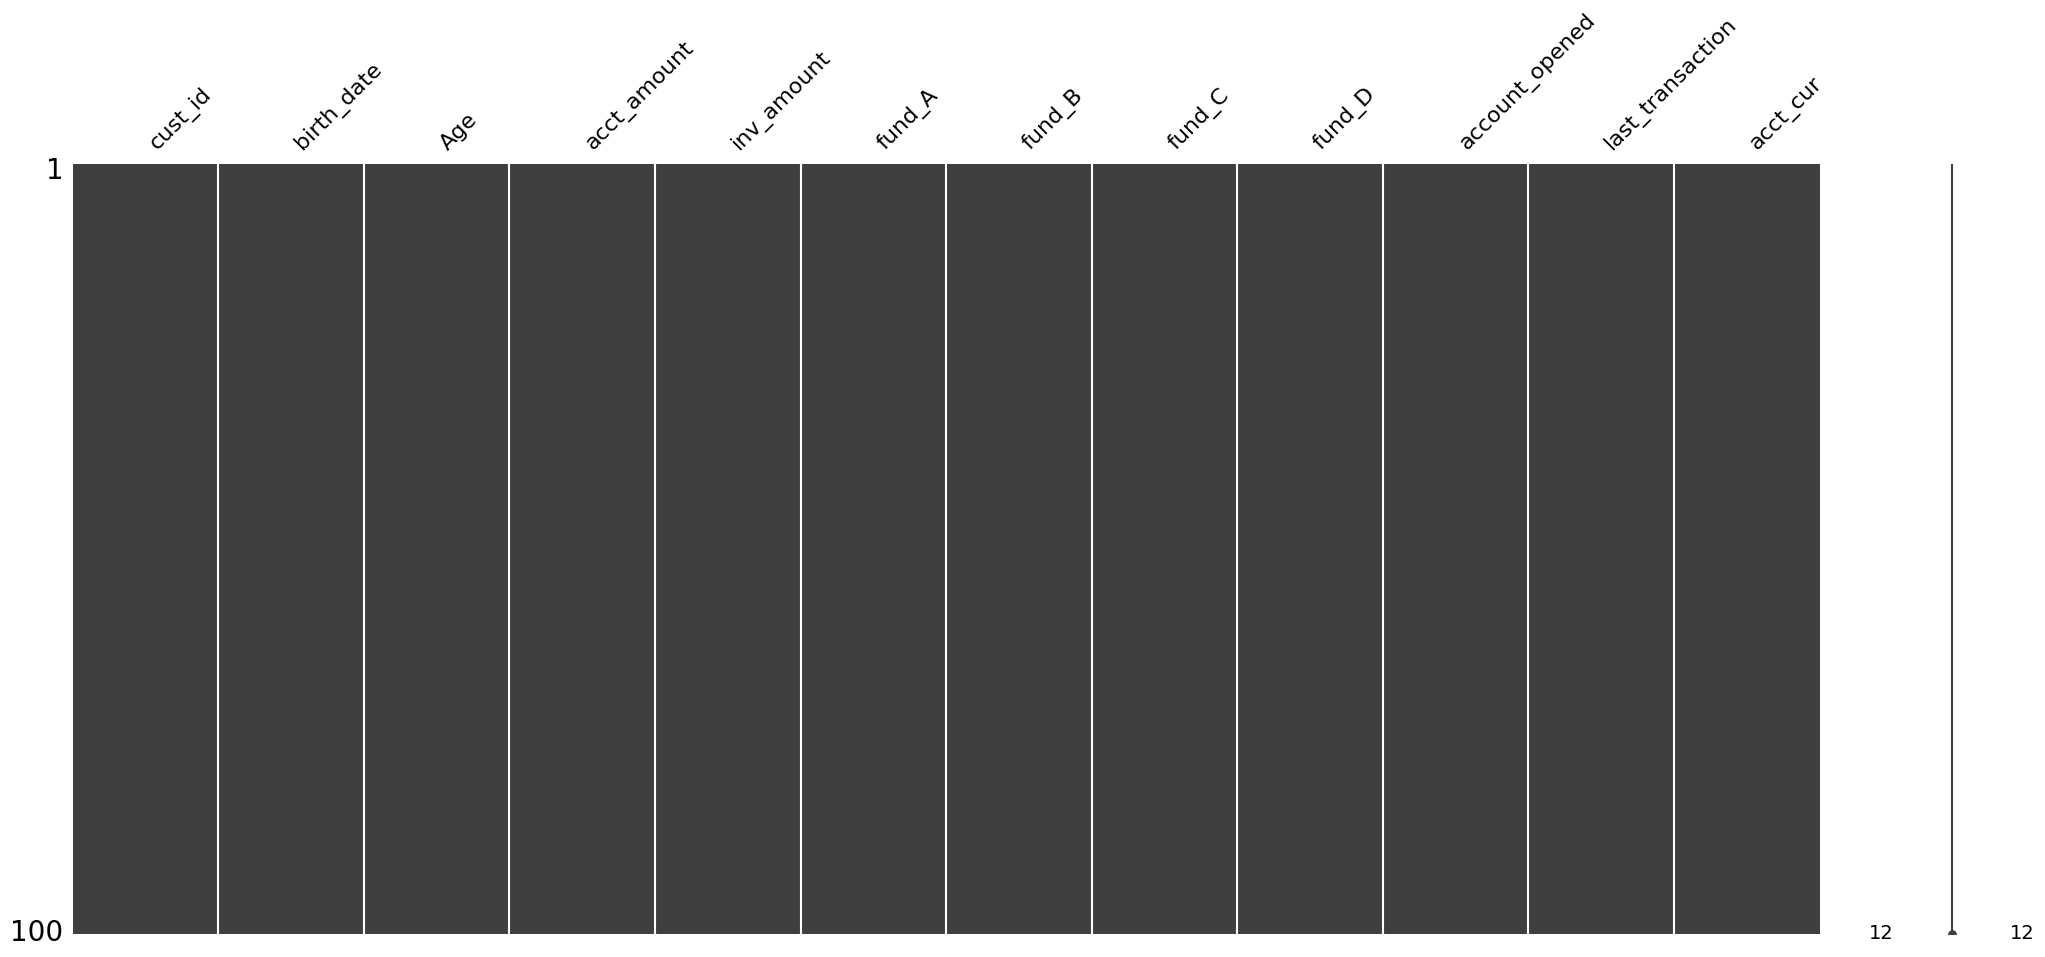

In [8]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

* Isolate the values of `banking` missing values of `inv_amount` into `missing_investors` and with non-missing `inv_amount` values into `investors`.

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_cur            0
dtype: int64


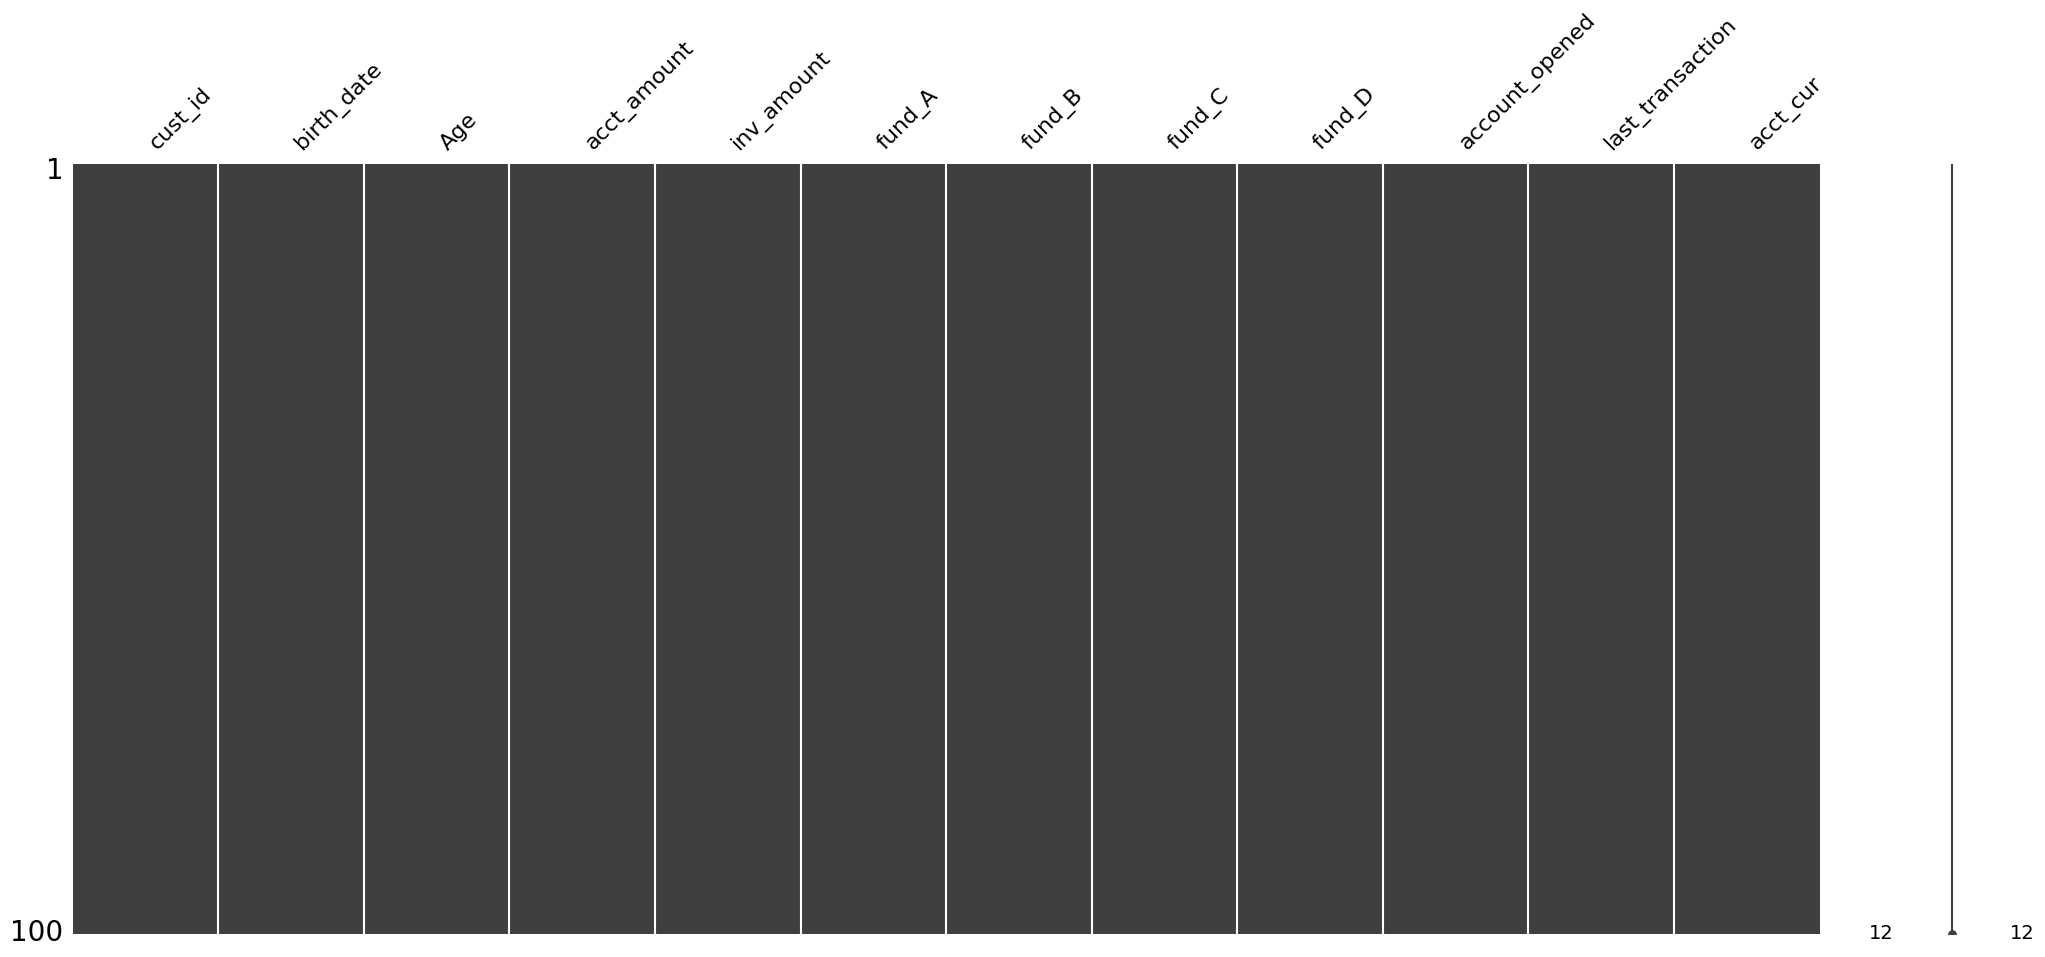

In [9]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

## Question

Now that you've isolated `banking` into `investors` and `missing_investors`, use the `.describe()` method on both of these DataFrames in the IPython shell to understand whether there are structural differences between them. What do you think is going on?

In [11]:
print(missing_investors.describe(),'\n')
print(investors.describe())

      birth_date  Age  acct_amount  inv_amount  fund_A  fund_B  fund_C  fund_D
count          0  0.0          0.0         0.0     0.0     0.0     0.0     0.0
mean         NaT  NaN          NaN         NaN     NaN     NaN     NaN     NaN
min          NaT  NaN          NaN         NaN     NaN     NaN     NaN     NaN
25%          NaT  NaN          NaN         NaN     NaN     NaN     NaN     NaN
50%          NaT  NaN          NaN         NaN     NaN     NaN     NaN     NaN
75%          NaT  NaN          NaN         NaN     NaN     NaN     NaN     NaN
max          NaT  NaN          NaN         NaN     NaN     NaN     NaN     NaN
std          NaN  NaN          NaN         NaN     NaN     NaN     NaN     NaN 

                birth_date         Age   acct_amount    inv_amount  \
count                  100  100.000000  1.000000e+02    100.000000   
mean   1977-08-27 05:16:48   43.170000  3.027560e+06  46006.300000   
min    1961-06-03 00:00:00   27.000000  1.220984e+04   3214.000000   
25%    

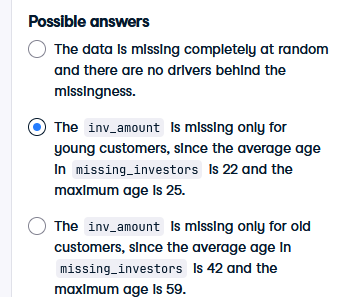

Sort the banking DataFrame by the age column and plot the missingness matrix of banking_sorted.

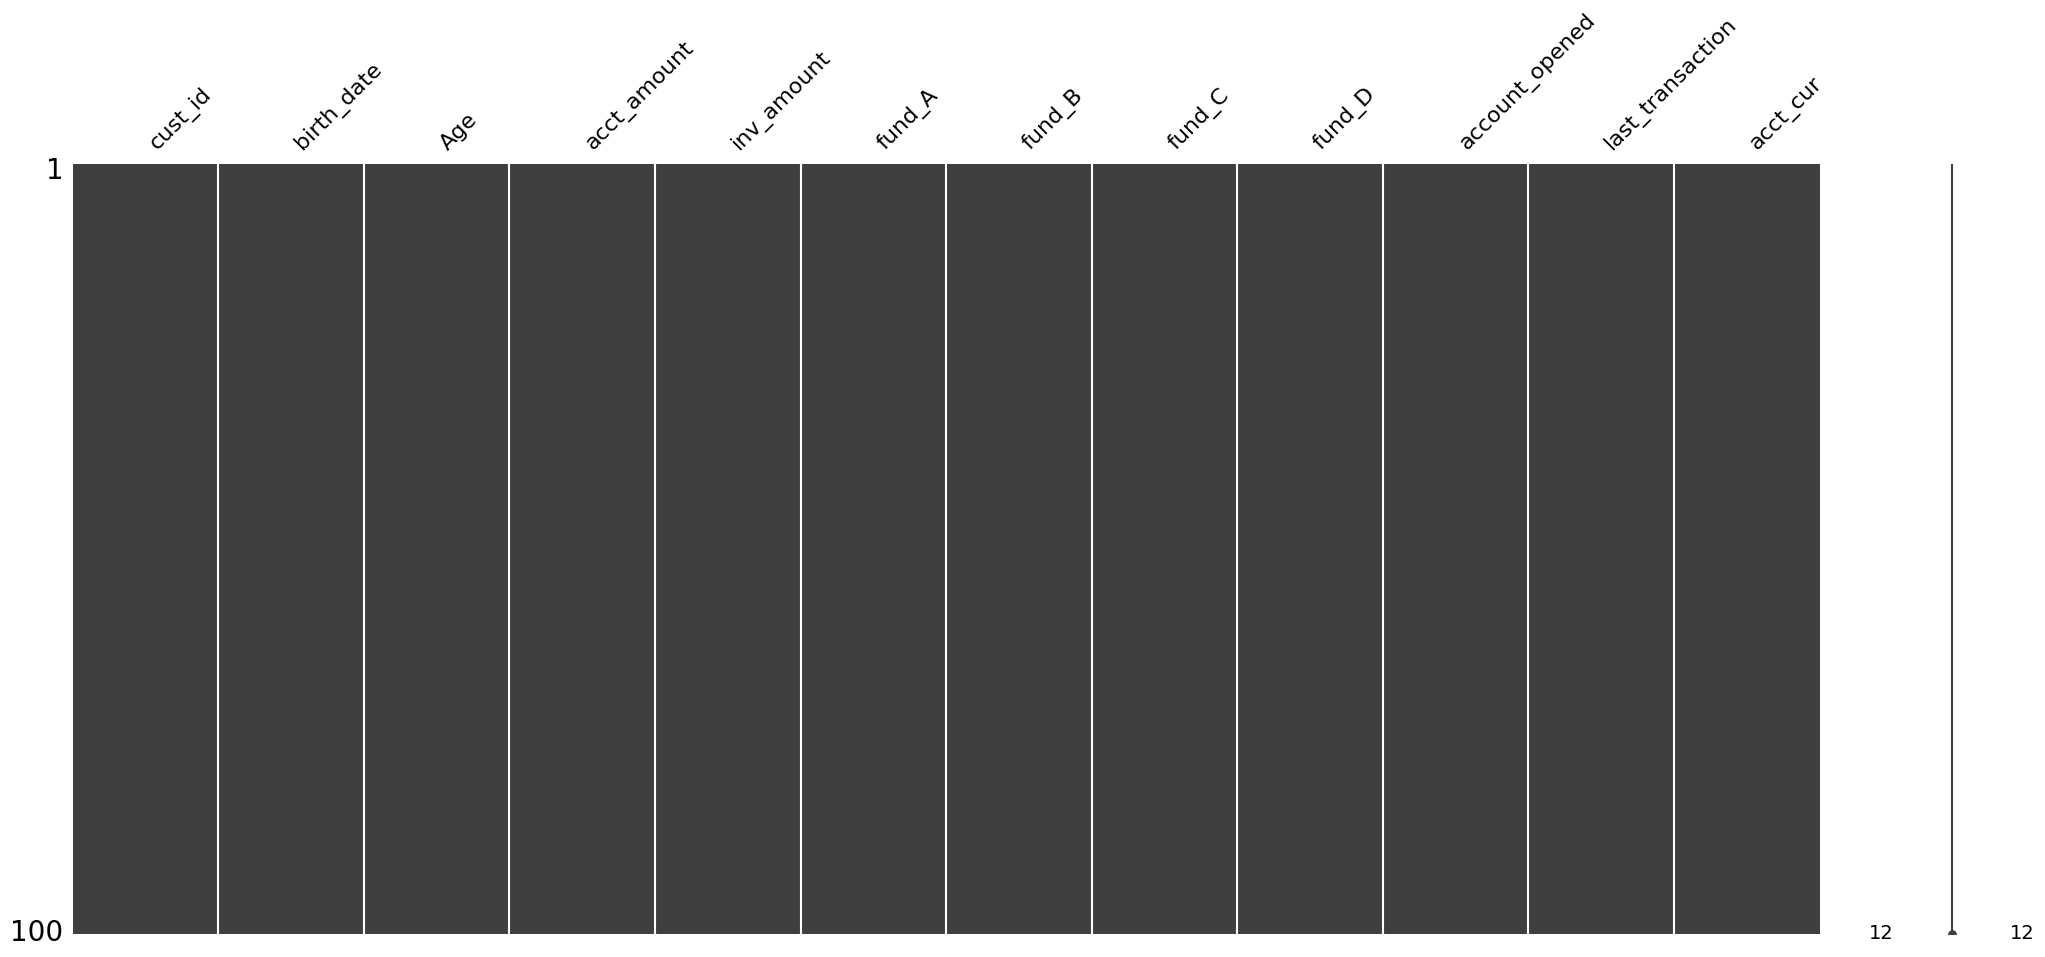

In [12]:
banking_sorted = banking.sort_values('Age')
msno.matrix(banking_sorted)
plt.show()